<a href="https://colab.research.google.com/github/Jafrin-2007/OASIS-infobyte-/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv.zip to spam_ham_dataset.csv (1).zip


In [18]:
import os
os.listdir()


['.config',
 'spam_ham_dataset.csv.zip',
 'spam_ham_dataset.csv (1).zip',
 'sample_data']

In [20]:
import pandas as pd

df = pd.read_csv("spam_ham_dataset.csv.zip", encoding="latin-1")
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
print(df.columns)
df.head()


Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [22]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [23]:
df.isnull().sum()


,0
label,0
text,0
label_num,0


In [24]:
X = df['text']
y = df['label_num']   # 0 = ham, 1 = spam


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
tfidf = TfidfVectorizer(stop_words='english')

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [27]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [28]:
y_pred = model.predict(X_test_vec)


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.923671497584541

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.73      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035



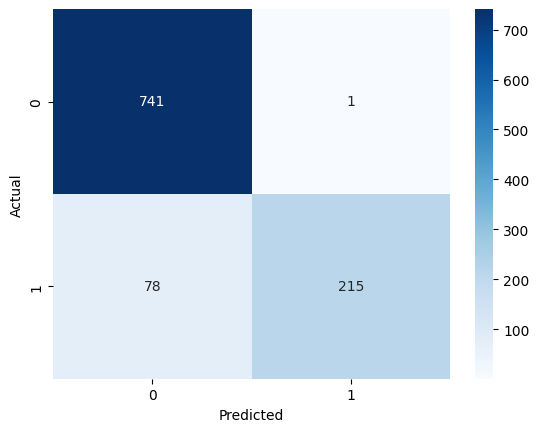

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [31]:
email = ["Congratulations! You have won a free Amazon gift card. Click now."]
email_vec = tfidf.transform(email)

prediction = model.predict(email_vec)

if prediction[0] == 1:
    print("📧 This email is SPAM")
else:
    print("📧 This email is NOT spam")


📧 This email is NOT spam
